This notebook is to run any personal input images through the classifier model created in AI-Artbench: AI-vs-Human art detection

**Loading the model**

In [6]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/kaggle/input/ai-artbench-classification-model/tensorflow2/version1/1/best_model.h5')

# Print the summary of the loaded model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

**Processing the input images**

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Path to the directory containing the images
images_dir = '/kaggle/input/samples/'

# List to store resized images, filenames, and predictions
resized_images = []
filenames = []
predictions = []

# Iterate over the files in the directory
for filename in os.listdir(images_dir):
    # Construct the full path to the image file
    filepath = os.path.join(images_dir, filename)
    
    # Load the image
    image = load_img(filepath, target_size=(32, 32))
    
    # Convert the image to a numpy array
    image_array = img_to_array(image)
    
    # Normalize the pixel values (optional, depending on your model)
    image_array /= 255.0
    
    # Append the resized and preprocessed image to the list
    resized_images.append(image_array)
    
    # Append the filename to the list
    filenames.append(filename)

# Convert the list of images to a numpy array
input_images = np.array(resized_images)

In [29]:
# # To visualize the processed images
# # Define the number of rows and columns for the grid
# columns = 3

# # Calculate the number of rows needed
# rows = math.ceil(len(filenames) / columns)

# # Create a new figure
# plt.figure(figsize=(12, 12))

# # Iterate over the images and plot them in the grid
# for i, (filename, image_array) in enumerate(zip(filenames, input_images)):
#     # Create subplots with the appropriate position
#     plt.subplot(rows, columns, i + 1)
    
#     # Display the image
#     plt.imshow(image_array)
#     plt.title('Filename: {}'.format(filename), fontsize=8)
#     plt.axis('off')

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()


**Prediction**

1/1 [==============================] - 0s 23ms/step


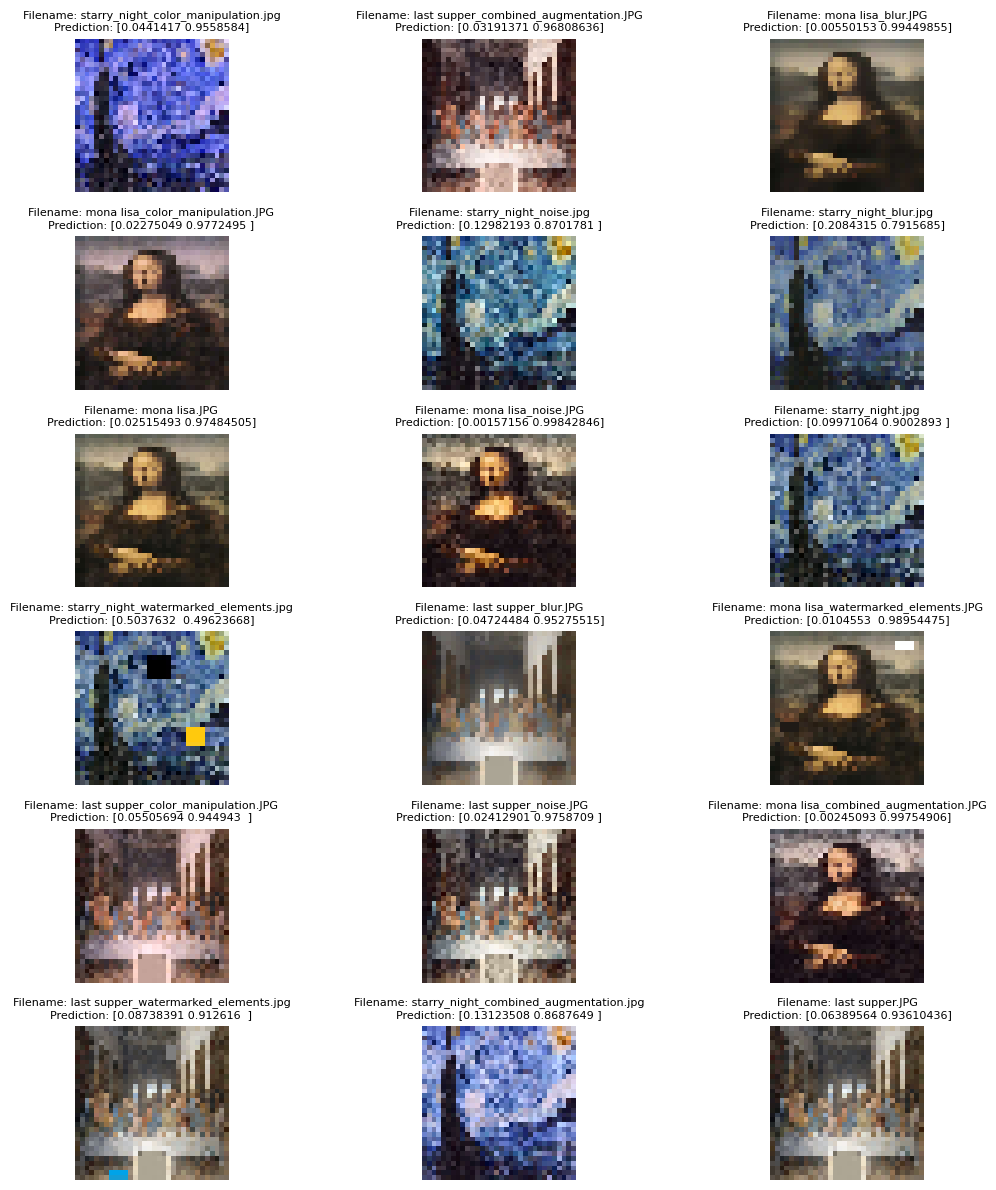

In [30]:
# # Make predictions using your model
# predictions = model.predict(input_images)

# # Zip the filenames, predictions, and images together
# data = zip(filenames, predictions, input_images)

# import math
# # Define the number of rows and columns for the grid
# columns = 3
# # Calculate the number of rows needed
# rows = math.ceil(len(filenames) / columns)

# # Create a new figure
# plt.figure(figsize=(12, 12))

# # Iterate over the images and plot them in the grid
# for i, (filename, prediction, image_array) in enumerate(data):
#     # Create subplots with the appropriate position
#     plt.subplot(rows, columns, i + 1)
    
#     # Display the image
#     plt.imshow(image_array)
#     plt.title('Filename: {}\nPrediction: {}'.format(filename, prediction), fontsize=8)
#     plt.axis('off')

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

1/1 [==============================] - 0s 26ms/step


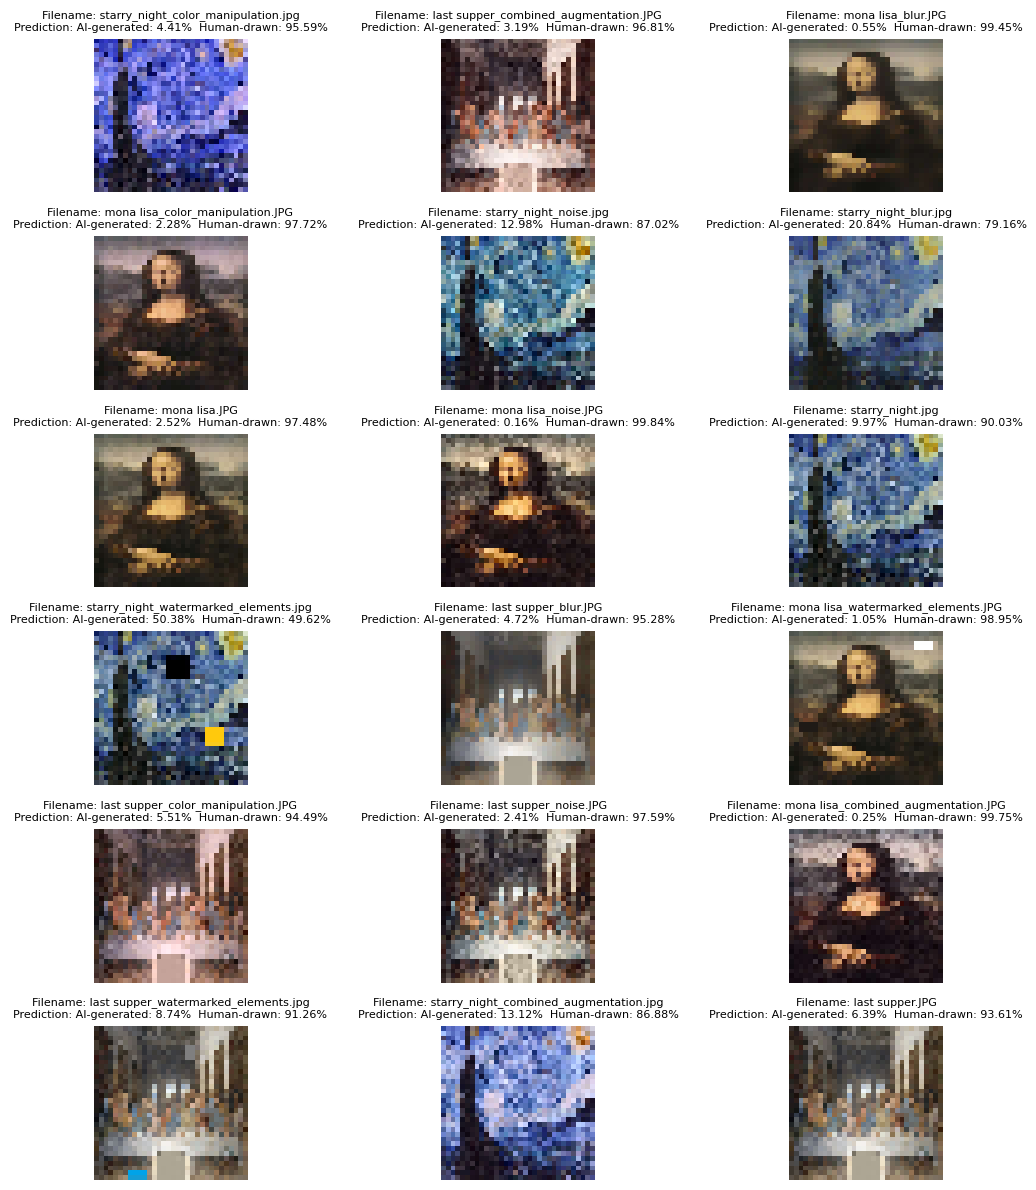

In [31]:
# Make predictions using your model
predictions = model.predict(input_images)

# Zip the filenames, predictions, and images together
data = zip(filenames, predictions, input_images)

import math

# Define the number of rows and columns for the grid
columns = 3

# Calculate the number of rows needed
rows = math.ceil(len(filenames) / columns)

# Create a new figure
plt.figure(figsize=(12, 12))

# Iterate over the images and plot them in the grid
for i, (filename, prediction, image_array) in enumerate(data):
    # Extract the percentages for each class
    ai_percentage = prediction[0] * 100
    human_percentage = prediction[1] * 100
    
    # Create subplots with the appropriate position
    plt.subplot(rows, columns, i + 1)
    
    # Display the image
    plt.imshow(image_array)
    plt.title('Filename: {}\nPrediction: AI-generated: {:.2f}%  Human-drawn: {:.2f}%'.format(filename, ai_percentage, human_percentage), fontsize=8)
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
